# Lab Program 9 - ML
# Classification using MLP

## Name: Jerin Mathew
## Roll No: 2139455

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('C:/ClassesMSC/DataSets/stroke-data.csv')
data.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [11]:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [9]:
# Replace NAN values in 'BMI' column with mean of column (BMI) values

In [10]:
mean_value = data['bmi'].mean()
data['bmi'].fillna(value = mean_value, inplace = True)

In [12]:
data['age'] = (data['age'].apply(np.ceil)).astype('int64')

In [13]:
data.drop(data[data.gender == 'Other'].index, inplace = True)

In [14]:
data.drop(data[data.smoking_status == 'Unknown'].index, inplace = True)

In [16]:
data.tail(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5092,56799,Male,76,0,0,Yes,Govt_job,Urban,82.35,38.900000,never smoked,0
5093,32235,Female,45,1,0,Yes,Govt_job,Rural,95.02,28.893237,smokes,0
5096,41512,Male,57,0,0,Yes,Govt_job,Rural,76.62,28.200000,never smoked,0
5099,7293,Male,40,0,0,Yes,Private,Rural,83.94,28.893237,smokes,0
5100,68398,Male,82,1,0,Yes,Self-employed,Rural,71.97,28.300000,never smoked,0
5102,45010,Female,57,0,0,Yes,Private,Rural,77.93,21.700000,never smoked,0
5105,18234,Female,80,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,44873,Female,81,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,19723,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,37544,Male,51,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


### Encode data

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() 
data['gender'] = data[['gender']].apply(le.fit_transform)
data['ever_married'] = data[['ever_married']].apply(le.fit_transform)
data ['Residence_type'] = data[['Residence_type']].apply(le.fit_transform)
data['work_type'] = data[['work_type']].apply(le.fit_transform)
data ['smoking_status'] = data[['smoking_status']].apply(le.fit_transform)

### Visualize the dataset

number with stroke:  202
number without stroke:  3363




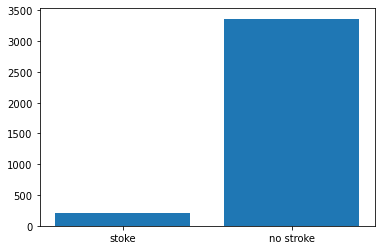

In [18]:
#Stroke vs No-stroke Observations

#Split the data into those with stroke and without stroke
no_stroke = data[data['stroke'] == 0] #extract the information of those without stroke
no_stroke_extract = no_stroke['stroke'] #extract one column 

yes_stroke = data[data['stroke'] == 1] #extract the information of those with stroke
yes_stroke_extract = yes_stroke['stroke'] #extract one column

count = [yes_stroke_extract.count(), no_stroke_extract.count()]
labels = ('stoke', 'no stroke')

#plot stroke vs no stroke observations
plt.bar(labels, count)
print ("number with stroke: ",yes_stroke_extract.count())
print ("number without stroke: ",no_stroke_extract.count())
print ("\n")

In [19]:
yes_stroke.describe()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.0
mean,36561.559406,0.425743,68.168317,0.306931,0.193069,0.896040,2.034653,0.524752,134.344653,30.460155,0.861386,1.0
std,22107.825562,0.495684,11.768555,0.462366,0.395688,0.305967,0.883113,0.500628,62.993827,5.982315,0.733420,0.0
min,210.000000,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.110000,16.900000,0.000000,1.0
25%,16646.750000,0.000000,59.000000,0.000000,0.000000,1.000000,2.000000,0.000000,79.875000,27.025000,0.000000,1.0
50%,36522.000000,0.000000,71.000000,0.000000,0.000000,1.000000,2.000000,1.000000,106.575000,28.896618,1.000000,1.0
75%,56437.500000,1.000000,78.000000,1.000000,0.000000,1.000000,3.000000,1.000000,196.867500,32.975000,1.000000,1.0
max,72081.000000,1.000000,82.000000,1.000000,1.000000,1.000000,3.000000,1.000000,271.740000,56.600000,2.000000,1.0


In [20]:
no_stroke.describe()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,3363.000000,3363.000000,3363.000000,3363.000000,3363.000000,3363.000000,3363.000000,3363.000000,3363.000000,3363.000000,3363.000000,3363.0
mean,36793.457032,0.392804,47.700565,0.114184,0.056200,0.752007,1.913767,0.507880,107.448379,30.224027,0.980077,0.0
std,21190.616570,0.488446,18.589570,0.318082,0.230341,0.431912,0.930511,0.500012,46.843959,7.221185,0.681109,0.0
min,67.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,11.500000,0.000000,0.0
25%,18160.500000,0.000000,33.000000,0.000000,0.000000,1.000000,2.000000,0.000000,77.325000,25.300000,1.000000,0.0
50%,37507.000000,0.000000,48.000000,0.000000,0.000000,1.000000,2.000000,1.000000,92.060000,28.893237,1.000000,0.0
75%,54863.500000,1.000000,62.000000,0.000000,0.000000,1.000000,2.000000,1.000000,114.520000,33.900000,1.000000,0.0
max,72915.000000,1.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,267.760000,92.000000,2.000000,0.0


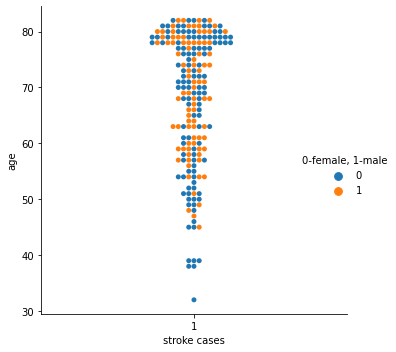

In [23]:
###Analysis of yes-stroke_cases 'actual stroke cases' by age and gender
#From age 30, there is an increased risk for stroke
#Women in their 30s and early 40s are likely to have stroke than men

#plot of age and gender
g = sns.catplot(data=yes_stroke, kind="swarm",x="stroke", y="age", hue="gender")
g.set_axis_labels("stroke cases", "age")
g.legend.set_title("0-female, 1-male")

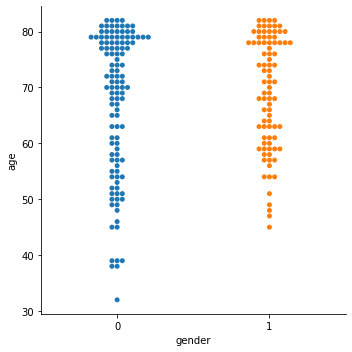

In [24]:
sns.catplot(data=yes_stroke, kind="swarm",x="gender", y="age")

### Sampling

In [25]:
#Extract the data containing children information
nos_of_children = data[data['work_type'] == 4]
nos_of_children_count = nos_of_children['work_type'].count()
print (nos_of_children_count)

nos_of_children.describe()
#There are 69 children in total in the dataset, in age range 10-16.

69


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,69.000000,69.000000,69.000000,69.0,69.0,69.0,69.0,69.000000,69.000000,69.000000,69.000000,69.0
mean,39029.478261,0.507246,12.347826,0.0,0.0,0.0,4.0,0.521739,101.737391,23.111496,0.840580,0.0
std,19473.985582,0.503610,1.634428,0.0,0.0,0.0,0.0,0.503187,34.917983,5.737176,0.441361,0.0
min,4833.000000,0.000000,10.000000,0.0,0.0,0.0,4.0,0.000000,57.280000,15.300000,0.000000,0.0
25%,21209.000000,0.000000,11.000000,0.0,0.0,0.0,4.0,0.000000,81.310000,18.800000,1.000000,0.0
50%,40390.000000,1.000000,12.000000,0.0,0.0,0.0,4.0,1.000000,92.650000,21.600000,1.000000,0.0
75%,54253.000000,1.000000,13.000000,0.0,0.0,0.0,4.0,1.000000,116.250000,25.300000,1.000000,0.0
max,71917.000000,1.000000,16.000000,0.0,0.0,0.0,4.0,1.000000,213.870000,41.700000,2.000000,0.0


In [26]:
data.drop(data[data.work_type == 4].index, inplace = True) #delete the records

number with stroke:  202
number without stroke:  3294


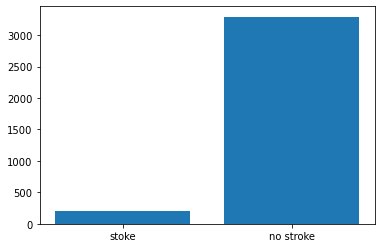

In [27]:
#split the data into those with stroke and without stroke
no_stroke = data[data['stroke'] == 0] #extract the information of those without stroke
no_stroke_extract = no_stroke['stroke'] #extract one column 

yes_stroke = data[data['stroke'] == 1] #extract the information of those with stroke
yes_stroke_extract = yes_stroke['stroke'] #extract one column

count = [yes_stroke_extract.count(), no_stroke_extract.count()]
labels = ('stoke', 'no stroke')

plt.bar(labels, count)
print ("number with stroke: ",yes_stroke_extract.count())
print ("number without stroke: ",no_stroke_extract.count())

In [28]:
#undersampling
class_no_stroke_extract = no_stroke.sample(800) 
sampled_data = pd.concat([class_no_stroke_extract, yes_stroke], axis=0)

#shuffle the data
sampled_data = sampled_data.sample(frac = 1)

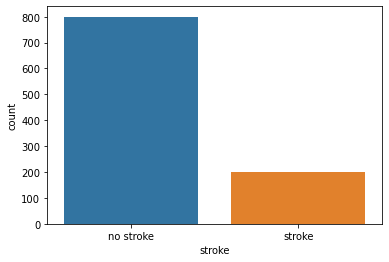

In [29]:

# visualize the output
g = sns.countplot(sampled_data['stroke'])
g.set_xticklabels(['no stroke','stroke'])
plt.show()

## Supervised Learning

In [30]:
# FEATURE SELECTION

#The selected features based on the feature analysis and visualizations
X = sampled_data[['age', 'hypertension', 'heart_disease', 'bmi', 'avg_glucose_level','smoking_status']] 
y = sampled_data['stroke']

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [35]:
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(activation='logistic',solver='lbfgs',hidden_layer_sizes=(15),max_iter=8000) 
#solver can be sgd, lbfgs or adam; lbfgs performed better
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=15, max_iter=8000,
              solver='lbfgs')

In [36]:
test_predictions_mlp = mlp_model.predict(X_test)
train_predictions_mlp = mlp_model.predict(X_train)

### Performance metrics - MLP

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
print('MLP model evaluation:')
print('Precision: ', precision_score(y_test,test_predictions_mlp))
print('Recall: ', recall_score(y_test, test_predictions_mlp))
print('\nAccuracy: ',accuracy_score(y_test, test_predictions_mlp))
print('f1_score: ',f1_score(y_test, test_predictions_mlp))

MLP model evaluation:
Precision:  0.43478260869565216
Recall:  0.2898550724637681

Accuracy:  0.7508305647840532
f1_score:  0.34782608695652173


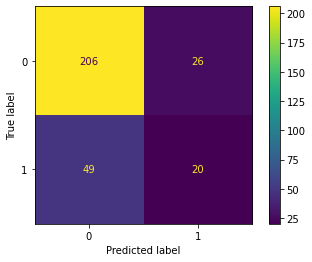

In [39]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(mlp_model,X_test,y_test)